In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import umap
import os
from datetime import datetime, timedelta
import pickle
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
import datetime

import re
import string
from collections import Counter

#Visualizations

import seaborn as sns
import matplotlib.pyplot as plt 
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import gensim

from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

from wordcloud import STOPWORDS
import scipy.sparse
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
import seaborn as sns; sns.set()
nltk.download('wordnet')
stemmer = SnowballStemmer(language='english')

[nltk_data] Downloading package wordnet to /home/jzhu10/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jzhu10/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jzhu10/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
df = pd.read_csv('./anxiety_1922.csv')

In [6]:
# Clean the dataframe by dropping any null values
df.dropna(inplace=True)

In [7]:
import string
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    
    # Remove short words (less than 3 characters)
    text = ' '.join([word for word in text.split() if len(word) > 2])
    
    # Remove numbers
    text = ''.join([word for word in text if not word.isdigit()])
    
    # Fix contractions
    text = contractions.fix(text)
    
    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text


In [8]:
df['text'] = df.selftext.apply(clean_text)

In [10]:
df.shape

(213867, 6)

In [11]:
df['length'] = df.text.str.len()

In [12]:
df1 = df[df['length']>=50]

In [13]:
df1.shape

(206842, 7)

In [14]:
# Develop TF-IDF features
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), max_df=0.75, min_df=0.001, use_idf=True)
posts_tfidf_bow = vectorizer.fit_transform(df1['text'].values.astype('U'))

In [15]:
# Examine TF-IDF features
print(vectorizer.get_feature_names()[0:20])
print(len(vectorizer.get_feature_names()))

['abandoned', 'abandonment', 'abdomen', 'abdominal', 'abilify', 'ability', 'able', 'able breathe', 'able calm', 'able control', 'able cope', 'able drive', 'able eat', 'able enjoy', 'able fall', 'able feel', 'able find', 'able focus', 'able function', 'able get']
10841


In [16]:
# Import required packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

In [21]:

# Test different cluster sizes
init_vals = np.random.choice(np.arange(100), size=10, replace=False)
silhouette_vals = []
sse_vals = []
for selected_k in np.array([10,11,12,13,14,15,16,17,18,19, 20, 21, 22, 23, 24, 25]):
  print("Cluster")
  print(selected_k)
  for i in np.arange(3):
    #print("Rep")
    #print(i)
    km = MiniBatchKMeans(n_clusters=selected_k, init='k-means++', n_init=1, init_size=1000, 
                     batch_size=1000, random_state = init_vals[i])
    km.fit(posts_tfidf_bow)
    silhouette_vals.append(metrics.silhouette_score(posts_tfidf_bow, km.labels_, sample_size=1000))
    sse_vals.append(km.inertia_)

Cluster
10
Rep
0
Rep
1
Rep
2
Cluster
11
Rep
0
Rep
1
Rep
2
Cluster
12
Rep
0
Rep
1
Rep
2
Cluster
13
Rep
0
Rep
1
Rep
2
Cluster
14
Rep
0
Rep
1
Rep
2
Cluster
15
Rep
0
Rep
1
Rep
2
Cluster
16
Rep
0
Rep
1
Rep
2
Cluster
17
Rep
0
Rep
1
Rep
2
Cluster
18
Rep
0
Rep
1
Rep
2
Cluster
19
Rep
0
Rep
1
Rep
2
Cluster
20
Rep
0
Rep
1
Rep
2
Cluster
21
Rep
0
Rep
1
Rep
2
Cluster
22
Rep
0
Rep
1
Rep
2
Cluster
23
Rep
0
Rep
1
Rep
2
Cluster
24
Rep
0
Rep
1
Rep
2
Cluster
25
Rep
0
Rep
1
Rep
2


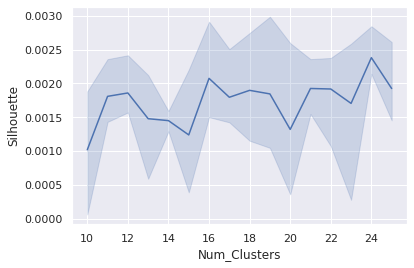

In [22]:
# Set k values to test
n_clusters = np.repeat(np.array([10,11,12,13,14,15,16,17,18,19, 20, 21, 22, 23, 24, 25]), 3)

# Plot silhouette scores
 
to_plot_df = {'Init_Value': np.repeat(init_vals[0:3], 16), 'Silhouette': silhouette_vals, 
             'Num_Clusters': n_clusters}
to_plot_df = pd.DataFrame(data=to_plot_df)
ax = sns.lineplot(x="Num_Clusters", y="Silhouette", data=to_plot_df)

In [50]:
# Generate clusters for a selected k
selected_k = 16
km = MiniBatchKMeans(n_clusters=selected_k, init='k-means++', n_init=3, init_size=1000, 
                     batch_size=1000)
km.fit(posts_tfidf_bow)

MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=16)

In [51]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(posts_tfidf_bow, km.labels_, sample_size=1000))

Silhouette Coefficient: 0.002


In [52]:
# Identify the top terms for each cluster, using the TF-IDF terms with the highest values in the centroid
# Adapted From: https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html

print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(selected_k):
  print("Cluster %d:" % i, end='')
  for ind in order_centroids[i, :19]:
    print(' %s' % terms[ind], end='')
  print()

Top terms per cluster:
Cluster 0: drink coffee drinking caffeine anxiety alcohol cup water day like feel get drank anxious know tea anyone drink coffee cup coffee
Cluster 1: school class year anxiety get like high school know going college really high feel teacher want time grade even would
Cluster 2: sleep night asleep cannot anxiety wake hour get day cannot sleep fall asleep fall like feel bed sleeping time tired know
Cluster 3: anxiety help get know really anyone like anxious day time feel cannot thing would want thought something think going
Cluster 4: mg taking take day dose anxiety week prescribed zoloft doctor lexapro medication xanax feel month anyone started like med
Cluster 5: home got get car back going time day like today know anxiety went house work could feel one driving
Cluster 6: attack panic panic attack heart anxiety like feel day get time chest feeling really know year pain going started felt
Cluster 7: die going die going like feel scared want like going die anxiety

In [37]:
# Store cluster numbers and annotations 
df1['cluster_number'] = km.labels_

/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
# Create a dictionary that maps cluster numbers to themes
# create a dictionary that maps cluster numbers to themes
theme_dict = {
    0: 'Breathing difficulties and shortness of breath',
    1: 'Eating disorders and food-related anxiety',
    2: 'Driving anxiety',
    3: 'General anxiety and feelings of unease',
    4: 'General anxiety and feelings of unease',
    5: 'General anxiety and feelings of unease',
    6: 'Medication and side effects',
    7: 'Heart palpitations and chest pain',
    8: 'General anxiety and feelings of unease',
    9: 'Physical symptoms of anxiety',
    10: 'Physical symptoms of anxiety',
    11: 'Work-related anxiety',
    13: 'Work-related anxiety',
    14: 'Physical symptoms of anxiety',
    15: 'General anxiety and feelings of unease'
}



# Map the cluster numbers to themes using the dictionary and create a new column "theme"
df1['theme'] = df1['cluster_number'].map(theme_dict)


/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
df1['theme'].value_counts()

General anxiety and feelings of unease            133611
Physical symptoms of anxiety                       32915
Work-related anxiety                               17170
Medication and side effects                         7880
Heart palpitations and chest pain                   7645
Driving anxiety                                     3152
Breathing difficulties and shortness of breath      2371
Eating disorders and food-related anxiety              1
Name: theme, dtype: int64

In [41]:
# Set date to datetime format. I'm assuming it's day.month.year in your original dataframe
df1['date'] = pd.to_datetime(df1['created_utc'])
df1.set_index('date', inplace=True)
#new_df = (df.groupby(['cluster_annotations', pd.Grouper(freq='M')]).count())
df2 = df1.groupby([pd.Grouper(freq='M'),'theme']).count()



/home/jzhu10/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Clustering Analysis of r/Depression Posts')

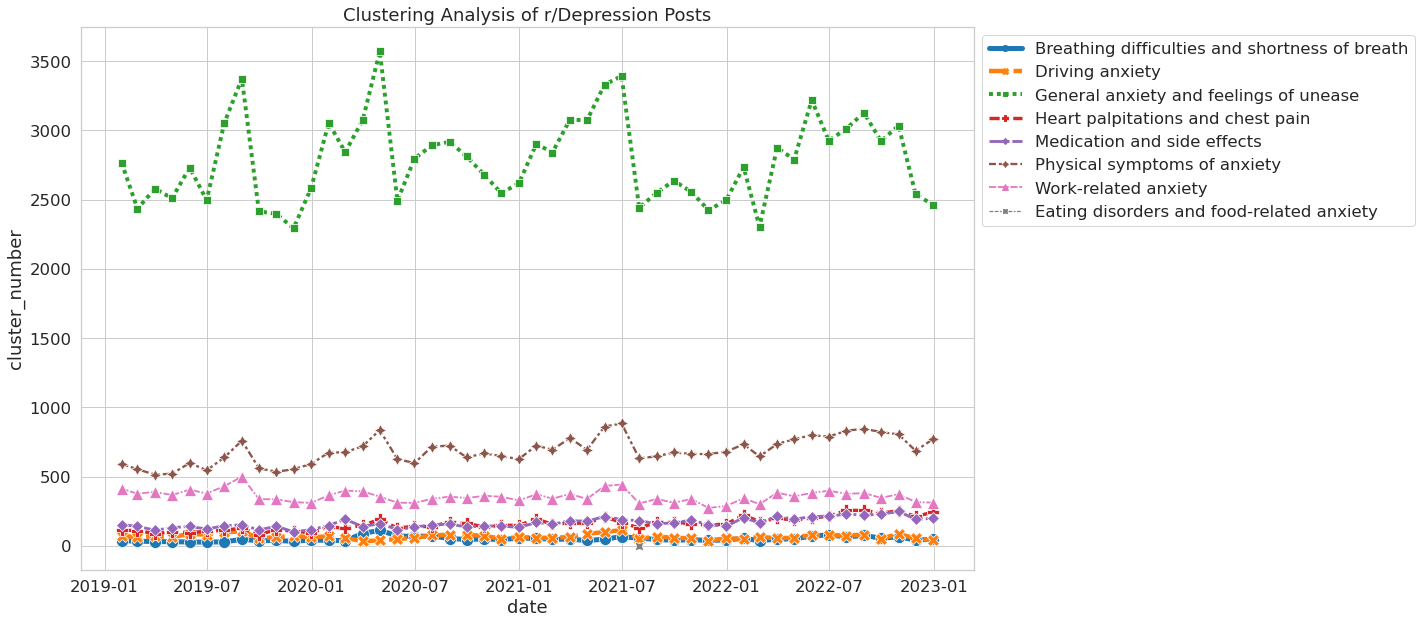

In [49]:
# Plot the responses for different events and regions
sns.set(rc={"figure.figsize":(16, 10)})
sns.set_style("whitegrid")
kwargs = dict(markersize = 12)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
lp = sns.lineplot(data=df2, x="date", y="cluster_number", hue="theme",  **kwargs, size = "theme",style= "theme", legend="brief", dashes = True, ci = None, palette= "tab10",markers = True)
lp.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Clustering Analysis of r/Depression Posts")

Text(0.5, 1.0, 'Clustering Analysis of r/Anxiety Posts')

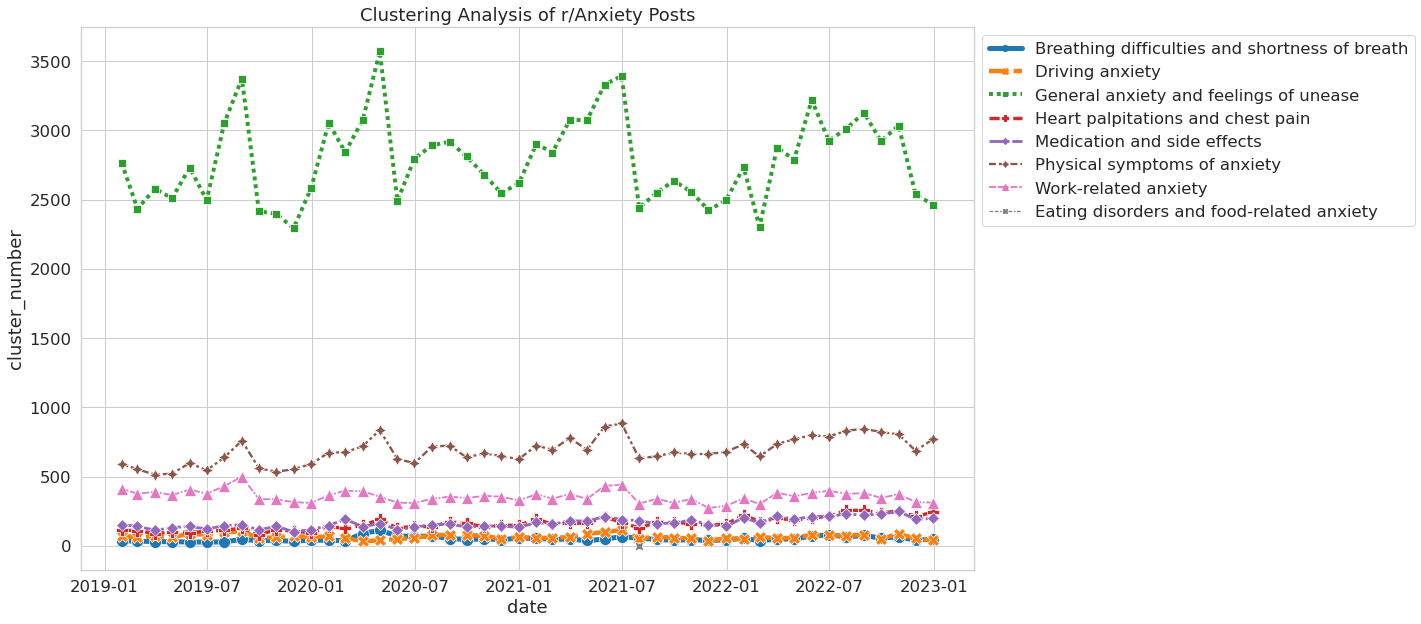

In [47]:
# Plot the responses for different events and regions
sns.set(rc={"figure.figsize":(16, 10)})
sns.set_style("whitegrid")
kwargs = dict(markersize = 12)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
lp = sns.lineplot(data=df2, x="date", y="cluster_number", hue="theme",  **kwargs, size = "theme",style= "theme", legend="brief", dashes = True, ci = None, palette= "tab10",markers = True)
lp.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Clustering Analysis of r/Anxiety Posts")

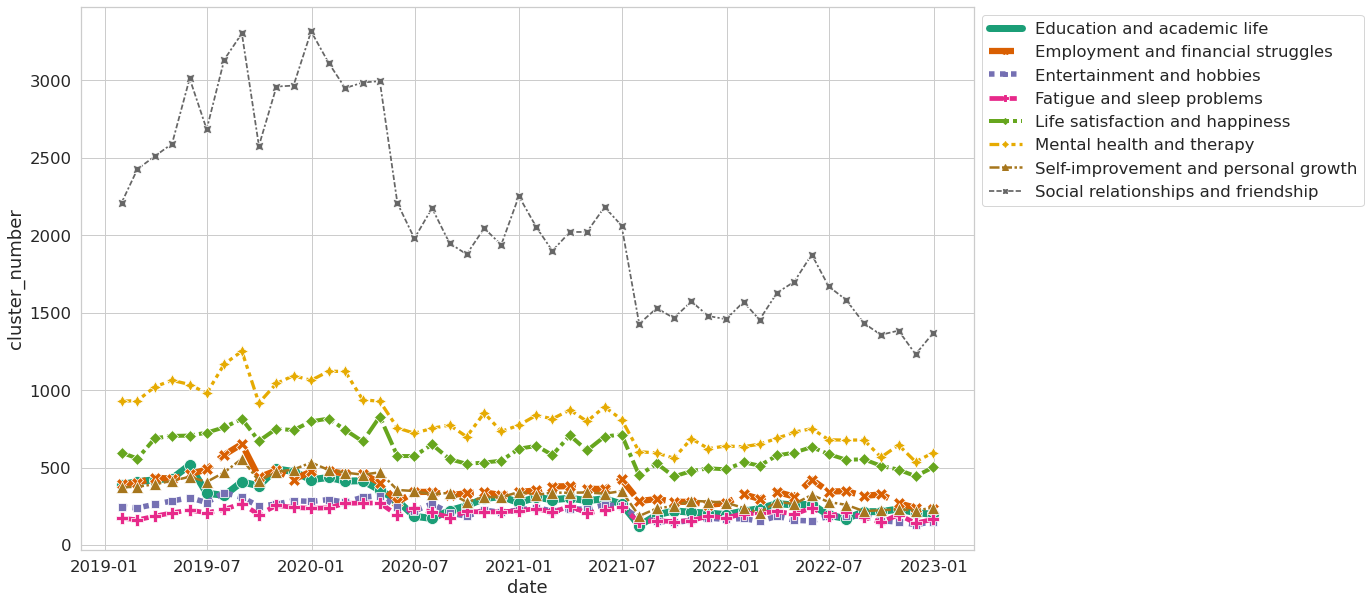

In [43]:
sns.set(rc={"figure.figsize":(16, 10)})
sns.set_style("whitegrid")
kwargs = dict(markersize = 12)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})
lp = sns.lineplot(data=df2, x="date", y="cluster_number", hue="theme",  **kwargs, size = "theme",style= "theme", legend="brief", dashes = True, ci = None, palette= "Dark2",markers = True)
lp.legend(loc='upper left', bbox_to_anchor=(1, 1))

